In [233]:
import pandas as pd
import requests
import json
import numpy as np
from config import api_key
from pprint import pprint
import matplotlib.pyplot as plt
import csv
import datetime
today = datetime.datetime.today()
print(today)
#&dep_schTime=2020-08-08T06:00:00.000"

2020-08-13 15:03:29.973467


In [234]:
Departure_url = f"http://aviation-edge.com/v2/public/timetable?key={api_key}&iataCode=DFW&type=departure"
#Arrival_url = f"http://aviation-edge.com/v2/public/timetable?key={api_key}&&iataCode=DFW&type=arrival"    

In [235]:
# Performing a GET request similar to the one we executed
# earlier
data = requests.get(Departure_url).json()
#responseA = requests.get(Arrival_url)
pprint(data)

ate': '40',
              'iataCode': 'LAX',
              'icaoCode': 'KLAX',
              'scheduledTime': '2020-08-13T22:09:00.000',
              'terminal': '4'},
  'codeshared': None,
  'departure': {'actualRunway': None,
                'actualTime': None,
                'baggage': None,
                'delay': None,
                'estimatedRunway': None,
                'estimatedTime': None,
                'gate': 'C15',
                'iataCode': 'DFW',
                'icaoCode': 'KDFW',
                'scheduledTime': '2020-08-13T21:00:00.000',
                'terminal': 'C'},
  'flight': {'iataNumber': 'AA2254', 'icaoNumber': 'AAL2254', 'number': '2254'},
  'status': 'scheduled',
  'type': 'departure'},
 {'airline': {'iataCode': 'AA', 'icaoCode': 'AAL', 'name': 'American Airlines'},
  'arrival': {'actualRunway': None,
              'actualTime': None,
              'baggage': None,
              'delay': None,
              'estimatedRunway': None,
              '

In [250]:
#JB-added terminal to the list which will give us another lookup option
names= []
datetimes= []
times= []
flights=[]
terminal= []
gate = []
status = []
length = int(len(data)-1)

for x in range(0,length):
    names.append(data[x]["airline"]["name"])
    datetime = data[x]["departure"]["scheduledTime"]
    #Time = Time.replace("T"," ")
    #TimeSplit1 = Time.split("T")[1]
    #times.append(f"{TimeSplit[0]}{TimeSplit[:5]}")
    datetimes.append(datetime)
    gate.append(data[x]["departure"]["gate"])
    flights.append(data[x]["flight"]["iataNumber"])
    terminal.append(data[x]["departure"]["terminal"])
    status.append(data[x]["status"])

df = pd.DataFrame()
df["name"] =names
df["scheduledTime"] =pd.to_datetime(datetimes)
for row in df["scheduledTime"]:
        times.append(row.time())
df["Time"] = times
df["iataNumber"]=flights
df["Terminal"]=terminal
df["Gate"]=gate
df["Status"]=status
#df["Time"] = datetime.strptime(df["scheduledTime"],"%H-%M")
#for index, row in df.iterrows():
        #row["Time"] = row["scheduledTime"].strftime('%H:%M:%S'))

#df.to_csv("airport_data.csv", encoding="utf-8", index=False, header=True)
test = df.groupby(["Time"])["iataNumber"].count()

#test.plot(kind="line", title="Flight per Hour", figsize = (20,10))


#fig, ax = plt.subplots(figsize=(20, 10))
xMin = f"{today} 05:00:00"
xMax = f"{today} 20:00:00"
# plt.xlim(xMin,xMax)
plt.plot_date(df["Time"].unique(),test, linestyle = "-")
#plt.plot(df["Time"].unique(),test, linestyle = "-")
#ax.set_xticklabels(["8am","10am","12pm","2pm","4pm","6pm","8pm"])
#plt.show()

# import scipy.interpolate
# x = datetime.datetime(df["scheduledTime"].unique()).timestamp()
# y = test
# print(x.dtype)
# f2 = interp1d(x, y, kind='cubic')
# import matplotlib.pyplot as plt
# plt.plot(x, y, 'o')#, xnew, f2(xnew), '--')



# plt.xlabel=["6am","8am","10am","noon","2pm","4pm","6pm","8pm"]

ConversionError: Failed to convert value(s) to axis units: array([datetime.time(7, 0), datetime.time(7, 5), datetime.time(7, 11),
       datetime.time(7, 15), datetime.time(7, 27), datetime.time(7, 30),
       datetime.time(7, 35), datetime.time(7, 47), datetime.time(8, 0),
       datetime.time(8, 5), datetime.time(8, 13), datetime.time(8, 20),
       datetime.time(8, 29), datetime.time(8, 30), datetime.time(8, 35),
       datetime.time(8, 36), datetime.time(8, 38), datetime.time(8, 39),
       datetime.time(8, 40), datetime.time(8, 45), datetime.time(8, 49),
       datetime.time(8, 50), datetime.time(8, 52), datetime.time(8, 55),
       datetime.time(8, 58), datetime.time(9, 0), datetime.time(9, 1),
       datetime.time(9, 5), datetime.time(9, 7), datetime.time(9, 9),
       datetime.time(9, 10), datetime.time(9, 12), datetime.time(9, 13),
       datetime.time(9, 14), datetime.time(9, 15), datetime.time(9, 16),
       datetime.time(9, 18), datetime.time(9, 20), datetime.time(9, 30),
       datetime.time(9, 32), datetime.time(9, 35), datetime.time(9, 39),
       datetime.time(9, 41), datetime.time(9, 45), datetime.time(9, 50),
       datetime.time(10, 0), datetime.time(10, 3), datetime.time(10, 5),
       datetime.time(10, 10), datetime.time(10, 20),
       datetime.time(10, 21), datetime.time(10, 24),
       datetime.time(10, 25), datetime.time(10, 26),
       datetime.time(10, 29), datetime.time(10, 30),
       datetime.time(10, 34), datetime.time(10, 35),
       datetime.time(10, 36), datetime.time(10, 40),
       datetime.time(10, 45), datetime.time(10, 50),
       datetime.time(10, 52), datetime.time(10, 55), datetime.time(11, 0),
       datetime.time(11, 5), datetime.time(11, 8), datetime.time(11, 10),
       datetime.time(11, 11), datetime.time(11, 14),
       datetime.time(11, 15), datetime.time(11, 16),
       datetime.time(11, 17), datetime.time(11, 20),
       datetime.time(11, 27), datetime.time(11, 29),
       datetime.time(11, 31), datetime.time(11, 35),
       datetime.time(11, 37), datetime.time(11, 40),
       datetime.time(11, 44), datetime.time(11, 47),
       datetime.time(11, 55), datetime.time(11, 56), datetime.time(12, 0),
       datetime.time(12, 4), datetime.time(12, 5), datetime.time(12, 10),
       datetime.time(12, 19), datetime.time(12, 20),
       datetime.time(12, 22), datetime.time(12, 24),
       datetime.time(12, 25), datetime.time(12, 26),
       datetime.time(12, 27), datetime.time(12, 28),
       datetime.time(12, 29), datetime.time(12, 30),
       datetime.time(12, 31), datetime.time(12, 35),
       datetime.time(12, 36), datetime.time(12, 38),
       datetime.time(12, 39), datetime.time(12, 40),
       datetime.time(12, 42), datetime.time(12, 44),
       datetime.time(12, 45), datetime.time(12, 50),
       datetime.time(12, 51), datetime.time(12, 55),
       datetime.time(12, 57), datetime.time(13, 0), datetime.time(13, 5),
       datetime.time(13, 6), datetime.time(13, 8), datetime.time(13, 10),
       datetime.time(13, 13), datetime.time(13, 14),
       datetime.time(13, 15), datetime.time(13, 19),
       datetime.time(13, 20), datetime.time(13, 21),
       datetime.time(13, 25), datetime.time(13, 27),
       datetime.time(13, 28), datetime.time(13, 30),
       datetime.time(13, 33), datetime.time(13, 40),
       datetime.time(13, 46), datetime.time(14, 0), datetime.time(14, 13),
       datetime.time(14, 15), datetime.time(14, 16),
       datetime.time(14, 18), datetime.time(14, 20),
       datetime.time(14, 25), datetime.time(14, 26),
       datetime.time(14, 28), datetime.time(14, 29),
       datetime.time(14, 30), datetime.time(14, 32),
       datetime.time(14, 34), datetime.time(14, 35),
       datetime.time(14, 36), datetime.time(14, 38),
       datetime.time(14, 40), datetime.time(14, 41),
       datetime.time(14, 42), datetime.time(14, 45),
       datetime.time(14, 46), datetime.time(14, 48),
       datetime.time(14, 50), datetime.time(14, 52),
       datetime.time(14, 53), datetime.time(14, 55),
       datetime.time(14, 56), datetime.time(14, 58), datetime.time(15, 0),
       datetime.time(15, 2), datetime.time(15, 5), datetime.time(15, 10),
       datetime.time(15, 12), datetime.time(15, 15),
       datetime.time(15, 20), datetime.time(15, 22),
       datetime.time(15, 28), datetime.time(15, 30),
       datetime.time(15, 40), datetime.time(15, 49),
       datetime.time(15, 51), datetime.time(16, 0), datetime.time(16, 4),
       datetime.time(16, 10), datetime.time(16, 15),
       datetime.time(16, 23), datetime.time(16, 30),
       datetime.time(16, 35), datetime.time(16, 36),
       datetime.time(16, 40), datetime.time(16, 41),
       datetime.time(16, 42), datetime.time(16, 43),
       datetime.time(16, 44), datetime.time(16, 45),
       datetime.time(16, 46), datetime.time(16, 47),
       datetime.time(16, 49), datetime.time(16, 50),
       datetime.time(16, 51), datetime.time(16, 54),
       datetime.time(16, 58), datetime.time(17, 0), datetime.time(17, 4),
       datetime.time(17, 5), datetime.time(17, 6), datetime.time(17, 8),
       datetime.time(17, 9), datetime.time(17, 10), datetime.time(17, 12),
       datetime.time(17, 15), datetime.time(17, 30),
       datetime.time(17, 31), datetime.time(17, 35),
       datetime.time(17, 40), datetime.time(17, 45),
       datetime.time(17, 49), datetime.time(18, 0), datetime.time(18, 1),
       datetime.time(18, 10), datetime.time(18, 25),
       datetime.time(18, 27), datetime.time(18, 30),
       datetime.time(18, 32), datetime.time(18, 35),
       datetime.time(18, 36), datetime.time(18, 39),
       datetime.time(18, 40), datetime.time(18, 44),
       datetime.time(18, 45), datetime.time(18, 48),
       datetime.time(18, 49), datetime.time(18, 50),
       datetime.time(18, 51), datetime.time(18, 52),
       datetime.time(18, 53), datetime.time(18, 54),
       datetime.time(18, 55), datetime.time(18, 59), datetime.time(19, 0),
       datetime.time(19, 5), datetime.time(19, 10), datetime.time(19, 15),
       datetime.time(19, 16), datetime.time(19, 20),
       datetime.time(19, 25), datetime.time(19, 30),
       datetime.time(19, 35), datetime.time(19, 40),
       datetime.time(19, 47), datetime.time(20, 0), datetime.time(20, 25),
       datetime.time(20, 30), datetime.time(20, 35),
       datetime.time(20, 40), datetime.time(20, 42),
       datetime.time(20, 45), datetime.time(20, 46),
       datetime.time(20, 50), datetime.time(20, 55), datetime.time(21, 0),
       datetime.time(21, 5), datetime.time(21, 6)], dtype=object)

In [185]:
# count the number of flights for each 5 min time period
df_flights = df.groupby(['scheduledTime'])
df_flt_counts = df_flights['iataNumber'].count()
df["Time"].dtype

dtype('O')

In [154]:
#JB-reducing the time intrevals to make graphing easier
interval_range = pd.interval_range(start=600, freq=40, end=2300)
df['Times_group'] = pd.cut(df['scheduledTime'], bins=interval_range)
df.head()

,name,scheduledTime,iataNumber,Terminal,Gate,Status,Times_group
0,Sun Country Airlines,2020-08-13 07:00:00,SY513,D,D16,active,NaN
1,American Airlines,2020-08-13 07:00:00,AA228,A,A38,active,NaN
2,American Airlines,2020-08-13 07:00:00,AA429,C,C10,active,NaN
3,American Airlines,2020-08-13 07:00:00,AA454,C,C26,active,NaN
4,American Airlines,2020-08-13 07:00:00,AA2438,C,C19,active,NaN


In [28]:
#JB- count the number of flights for each 20 min time period
df_flt_groups = df.groupby(['Times_group'])
df_group_count = df_flt_groups['iataNumber'].count()
#df_group_count.to_csv("groupedtimes.csv", encoding="utf-8", index=False, header=True)
df_group_count

Times_group
(600, 640]      0
(640, 680]      0
(680, 720]      0
(720, 760]      0
(760, 800]      0
(800, 840]      0
(840, 880]      0
(880, 920]      0
(920, 960]      0
(960, 1000]     0
(1000, 1040]    0
(1040, 1080]    0
(1080, 1120]    0
(1120, 1160]    0
(1160, 1200]    0
(1200, 1240]    0
(1240, 1280]    0
(1280, 1320]    0
(1320, 1360]    0
(1360, 1400]    0
(1400, 1440]    0
(1440, 1480]    0
(1480, 1520]    0
(1520, 1560]    0
(1560, 1600]    0
(1600, 1640]    0
(1640, 1680]    0
(1680, 1720]    0
(1720, 1760]    0
(1760, 1800]    0
(1800, 1840]    0
(1840, 1880]    0
(1880, 1920]    0
(1920, 1960]    0
(1960, 2000]    0
(2000, 2040]    0
(2040, 2080]    0
(2080, 2120]    0
(2120, 2160]    0
(2160, 2200]    0
(2200, 2240]    0
(2240, 2280]    0
Name: iataNumber, dtype: int64

Text(0, 0.5, 'Number of Departures')

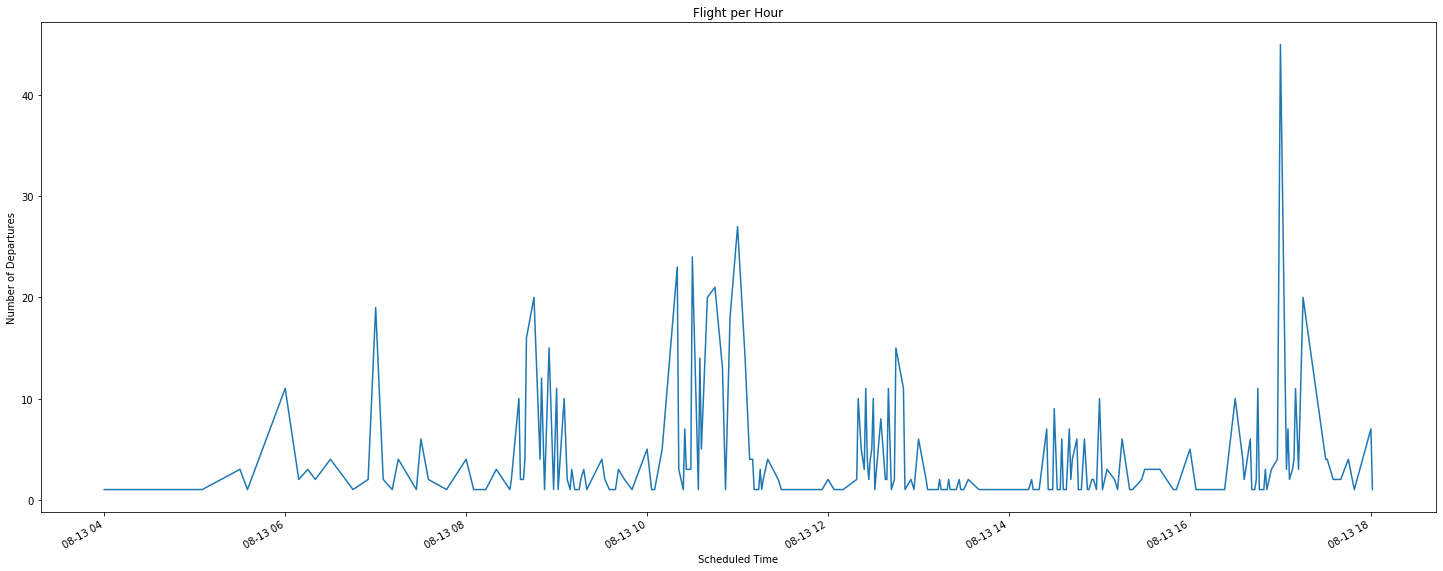

In [8]:
f, ax = plt.subplots(figsize=(25,10))
df_flt_counts.plot(kind="line", title="Flight per Hour")

plt.xlabel("Scheduled Time")
plt.ylabel("Number of Departures")
# xTicksList = [600,630,700,730,800,830,900,930,1000,1030,1100,1200,1230,,1300,1330,1400,1430,1500,1530,1600,1630,1700,1730,1800,1830,1900,1930,2000,2030,2100,2130,2200,2230,2300,2330,2400]
# xTicksLabels =["600","630","700","730","800","830","900","930","1000","1030","1100","1200","1230",,"1300","1330","1400","1430","1500","1530","1600","1630","1700","1730","1800","1830","1900","1930","2000","2030","2100","2130","2200","2230","2300","2330","2400"]
# plt.xticks=(xTicksList,xTickLabels)


Text(0, 0.5, 'Number of Departures')

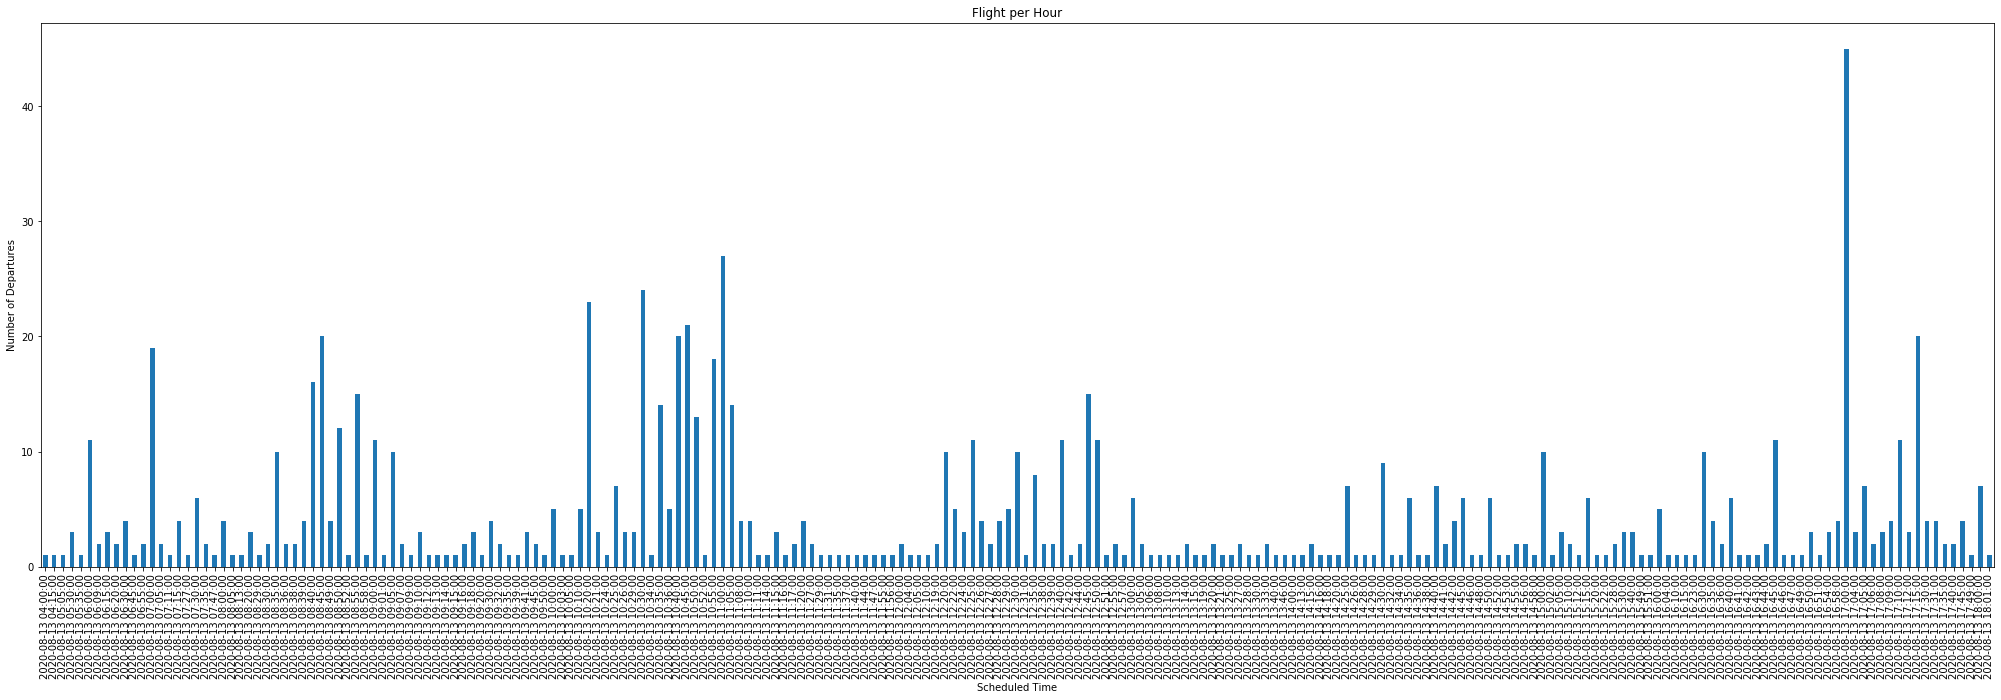

In [9]:
f, ax = plt.subplots(figsize=(35,10))
df_flt_counts.plot(kind="bar", title="Flight per Hour")

plt.xlabel("Scheduled Time")
plt.ylabel("Number of Departures")
ylabel
ylabel
